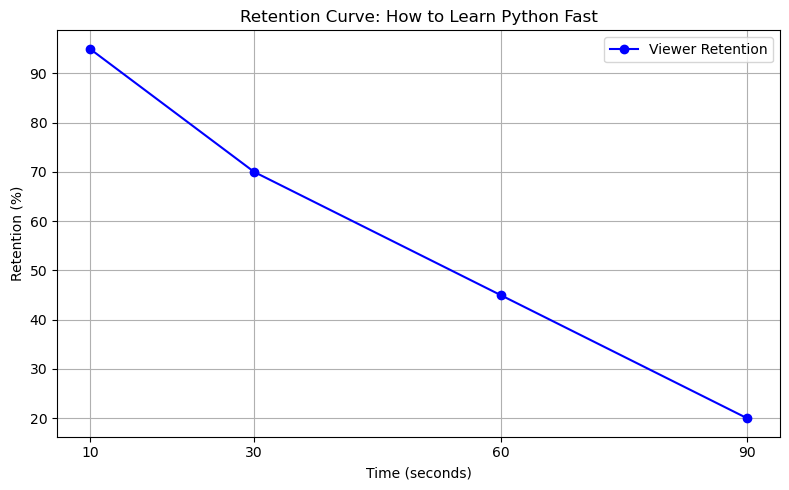


Average Drop-off Between Time Stages:
10s to 30s: 28.793183940242763
30s to 60s: 26.66199813258637
60s to 90s: 20.816993464052285


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = "C:\\Users\\hp\\Downloads\\video_retention_data.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Step 2: Filter out low-view videos
df = df[df['views'] > 1000]  # Keeping only videos with >1000 views

# Step 3: Calculate retention percentages
df['ret_10s_pct'] = (df['retention_10s'] / df['views']) * 100
df['ret_30s_pct'] = (df['retention_30s'] / df['views']) * 100
df['ret_60s_pct'] = (df['retention_60s'] / df['views']) * 100
df['ret_90s_pct'] = (df['retention_90s'] / df['views']) * 100

# Step 4: Plot retention curve for each video
def plot_retention(video_row):
    x = [10, 30, 60, 90]
    y = [
        video_row['ret_10s_pct'],
        video_row['ret_30s_pct'],
        video_row['ret_60s_pct'],
        video_row['ret_90s_pct']
    ]

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='blue',label = 'Viewer Retention')
    plt.title(f"Retention Curve: {video_row['title']}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Retention (%)")
    plt.xticks([10, 30, 60, 90])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("retention_curve_video1.png")
    plt.show()

# Example: Plot retention for first video
plot_retention(df.iloc[0])

# Step 5: Calculate drop-off between stages
df['drop_10_30'] = df['ret_10s_pct'] - df['ret_30s_pct']
df['drop_30_60'] = df['ret_30s_pct'] - df['ret_60s_pct']
df['drop_60_90'] = df['ret_60s_pct'] - df['ret_90s_pct']

# Step 6: Print summary statistics
print("\nAverage Drop-off Between Time Stages:")
print("10s to 30s:", df['drop_10_30'].mean())
print("30s to 60s:", df['drop_30_60'].mean())
print("60s to 90s:", df['drop_60_90'].mean())
